In [ ]:
!pip install -q kaggle


In [ ]:
 from google.colab import files

files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c digit-recognizer

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip test.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [ ]:
import pandas as pd
df_train = pd.read_csv('train.csv', header=0)
df_test = pd.read_csv('test.csv', header=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
array_train = np.array(df_train)
array_test = np.array(df_test)
#print(np.shape(array_test))
#print(np.shape(array_train))
#print((array_train[0,:]))

In [ ]:
labels = []
for i in range(np.shape(array_train[:,0])[0]):
  labels.append(array_train[i,0])
labels = np.array(labels)


42000


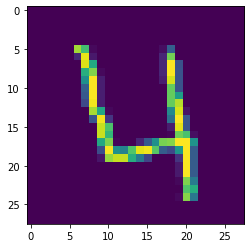

In [ ]:
import cv2 as cv
plt.imshow((np.reshape(array_train[3][1:785],(28,28))))
print(np.shape(array_train)[0])

In [ ]:
#pre-processing
X_train = []
for i in range(np.shape(array_train)[0]):
  X_train.append(np.reshape(array_train[i][1:785],(28,28)))
X_train = np.array(X_train)




TypeError: ignored

In [ ]:
#libraries
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Reshape, Conv1DTranspose, Activation, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from keras.layers.normalization import BatchNormalization

#model
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(10, activation='softmax'))
#summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)       

In [ ]:
X_test = []
for i in range(np.shape(array_test)[0]):
  X_test.append(np.reshape(array_test[i][0:784],(28,28)))
X_test = np.array(X_test)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# convert class vectors to binary class matrices

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


from keras.utils.np_utils import to_categorical
y_train = to_categorical(labels, num_classes=10)
X_train1, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)


x_train shape: (42000, 28, 28, 1)
42000 train samples
28000 test samples


In [ ]:
print(np.shape(X_train))

(42000, 28, 28)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = model.fit(X_train1, y_train, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
1050/1050 [==============================] - 9s 8ms/step - loss: 0.4208 - accuracy: 0.8695 - val_loss: 0.0873 - val_accuracy: 0.9715
Epoch 2/25
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1430 - accuracy: 0.9566 - val_loss: 0.1622 - val_accuracy: 0.9523
Epoch 3/25
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1066 - accuracy: 0.9672 - val_loss: 0.0396 - val_accuracy: 0.9871
Epoch 4/25
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0904 - accuracy: 0.9735 - val_loss: 0.0378 - val_accuracy: 0.9875
Epoch 5/25
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0793 - accuracy: 0.9756 - val_loss: 0.0436 - val_accuracy: 0.9858
Epoch 6/25
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.0419 - val_accuracy: 0.9875
Epoch 7/25
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0656 - accuracy: 0.9807 - val_loss: 0.0297 - val_accuracy:

In [ ]:
predictions = model.predict(X_test)
results = np.argmax(predictions,axis = 1)
np.savetxt('results.csv',results,delimiter='\n')